In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
csv = "/space/mcdonald-syn01/1/projects/jsawant/DSC250/qualitative_results.csv"
df = pd.read_csv(csv)
df.head()

,Unnamed: 0,ID,filepath,label,Real/synthetic
0,0,7,/space/mcdonald-syn01/1/BIDS//enigma_conglom//...,HC,Real
1,1,37,/space/mcdonald-syn01/1/BIDS//enigma_conglom//...,HC,Real
2,2,14,/space/mcdonald-syn01/1/BIDS//enigma_conglom//...,HC,Real
3,3,40,/space/mcdonald-syn01/1/BIDS//CAPES//derivativ...,HC,Real
4,4,4,/space/mcdonald-syn01/1/BIDS//ECP_dataset_bids...,HC,Real


In [54]:
idx = 46
df_ = df[df["ID"]==idx]
print(f"{df_["Real/synthetic"].iloc[0]}")
print(f"{df_["label"].iloc[0]}")

Synthetic
TLE


In [2]:
df = pd.read_csv("/space/mcdonald-syn01/1/projects/jsawant/Diffusion_paper/data_csvs/train.csv")
df = df.loc[df["HC_vs_LTLE_vs_RTLE_string"].isin(["right","left","HC"])]

In [3]:
num_samples = 500
if num_samples is not None:
    # Calculate the proportion of each class
    class_column = "HC_vs_LTLE_vs_RTLE_string"
    class_counts = df[class_column].value_counts()
    class_proportions = class_counts / len(df)
    
    # Create a stratified sample with the same proportions
    stratified_samples = {}
    for class_name, proportion in class_proportions.items():
        class_sample_size = int(np.round(num_samples * proportion))
        class_data = df[df[class_column] == class_name]
        
        # If we need more samples than available, use sampling with replacement
        replace = class_sample_size > len(class_data)
        stratified_samples[class_name] = class_data.sample(n=class_sample_size, replace=replace)
    
    # Combine all stratified samples
    data = pd.concat(stratified_samples.values()).reset_index(drop=True)

In [10]:
len(data[data['HC_vs_LTLE_vs_RTLE_string']=="HC"])

212

In [12]:
class_counts/len(df)

HC_vs_LTLE_vs_RTLE_string
HC       0.42343
left     0.33419
right    0.24238
Name: count, dtype: float64

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [8]:
with open("/space/mcdonald-syn01/1/projects/jsawant/Diffusion_paper/classifier/new_runs/runs_syn/syn_2723/fold_1/saliency_maps/mwp1sub-004013_ses-01_T1w_saliency.pkl", "rb") as f:
    data = pickle.load(f)
data.keys()


dict_keys(['original_path', 'predicted_score', 'predicted_label', 'true_label', 'saliency_map'])

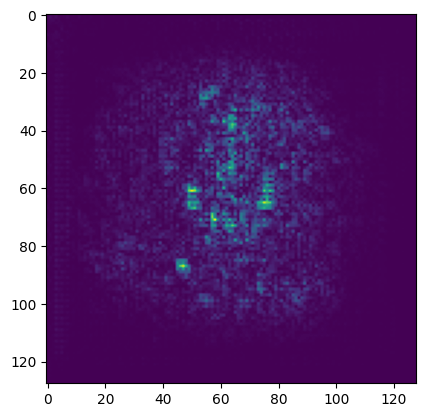

In [15]:
plt.imshow(data["saliency_map"][0][72,:,:])

In [13]:
data["saliency_map"][0][72,:,:].shape

(128, 128)

In [16]:
data

{'original_path': '/space/mcdonald-syn01/1/BIDS//enigma_conglom//derivatives//cat12_4/sub-004013/ses-01/anat/mwp1sub-004013_ses-01_T1w.nii',
 'predicted_score': 0.9951179027557373,
 'predicted_label': 1,
 'true_label': 1,
 'saliency_map': array([[[[1.71348447e-07, 5.10786151e-07, 5.46026854e-07, ...,
           1.97904590e-08, 1.93341321e-09, 3.97609812e-09],
          [6.67426150e-07, 1.22280005e-06, 8.86112616e-07, ...,
           6.07494428e-08, 4.57485854e-08, 3.17579207e-08],
          [1.11632410e-07, 6.26165388e-07, 6.66823041e-08, ...,
           2.56754795e-09, 3.30111316e-09, 2.59411816e-08],
          ...,
          [1.13870051e-08, 7.90043870e-08, 5.80285935e-08, ...,
           1.40185437e-08, 7.54383844e-09, 2.20603713e-09],
          [1.87512068e-08, 5.68630698e-09, 1.25632225e-08, ...,
           7.59970309e-09, 1.32873446e-09, 2.25581709e-09],
          [1.96715355e-08, 1.73573387e-08, 2.74958101e-09, ...,
           7.01820113e-09, 4.41695214e-09, 7.22551241e-10]],
 


In [3]:
len(fids)

112

In [4]:
fids

array([ 0.60344897,  0.17416007,  0.15663842,  0.17808437,  0.21545267,
        0.33458086,  0.37371243,  2.658008  ,  6.07411741,  6.1156197 ,
       19.79981067, 26.50330662, 22.39349416, 21.88779035, 22.2443169 ,
       23.9745663 , 28.21409733, 32.09124173, 31.20252288, 29.49165134,
       26.50043142, 26.58267114, 24.67575212, 22.22705525, 20.08855423,
       18.40197127, 15.65784528, 15.39377836, 15.60180537, 15.03510624,
       16.92005466, 17.19972282, 17.82705767, 17.79797759, 16.38378029,
       20.63545541, 24.64340397, 18.28779543, 16.05493796, 15.7435996 ,
       18.18469192, 18.69080096, 19.09775528, 17.19478677, 19.09394596,
       17.59370779, 16.49545359, 16.58158529, 16.56167036, 16.64577934,
       13.217923  , 11.2911483 , 11.159468  , 15.64053751, 19.15148038,
       21.55664575, 22.21709689, 18.76709792, 13.18703657,  9.85753836,
       10.64537965, 12.15982537, 16.51071455, 16.69469305, 15.51505033,
       12.97919741, 15.84311465, 16.92318506, 17.17932811, 18.14